In [1]:
import pandas as pd
import numpy as np


In [8]:
df= pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
# Count whitespace-only strings and NaNs per column without redefining df

# whitespace-only strings (e.g., '', '   ')
whitespace_only = df.apply(lambda s: s.astype(str).str.strip().eq('').sum())

# NaN values
nan_counts = df.isna().sum()

# Combined "blank" cells (whitespace-only or NaN)
blank_total = whitespace_only + nan_counts

print("Whitespace-only strings per column:")
print(whitespace_only)

print("\nNaN values per column:")
print(nan_counts)

print("\nTotal blank cells (whitespace-only or NaN) per column:")
print(blank_total)

Whitespace-only strings per column:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

NaN values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Chur

In [10]:
# Replace whitespace-only strings in TotalCharges with 0 and convert to float
df['TotalCharges'] = (
    pd.to_numeric(df['TotalCharges'].replace(r'^\s*$', '0', regex=True), errors='coerce')
    .fillna(0.0)
    .astype(float)
)

In [12]:
# Conteo de valores "Yes" y "No" en la columna Churn
churn_counts = df['Churn'].value_counts()
print(churn_counts)
print(f"Proportion of 'Yes': {churn_counts['Yes'] / churn_counts.sum():.2%}"
      f", Proportion of 'No': {churn_counts['No'] / churn_counts.sum():.2%}")

Churn
No     5174
Yes    1869
Name: count, dtype: int64
Proportion of 'Yes': 26.54%, Proportion of 'No': 73.46%


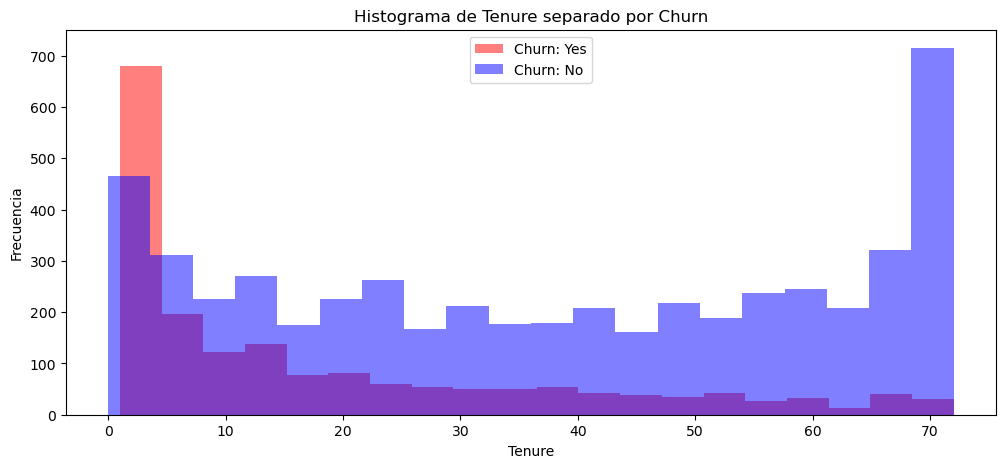

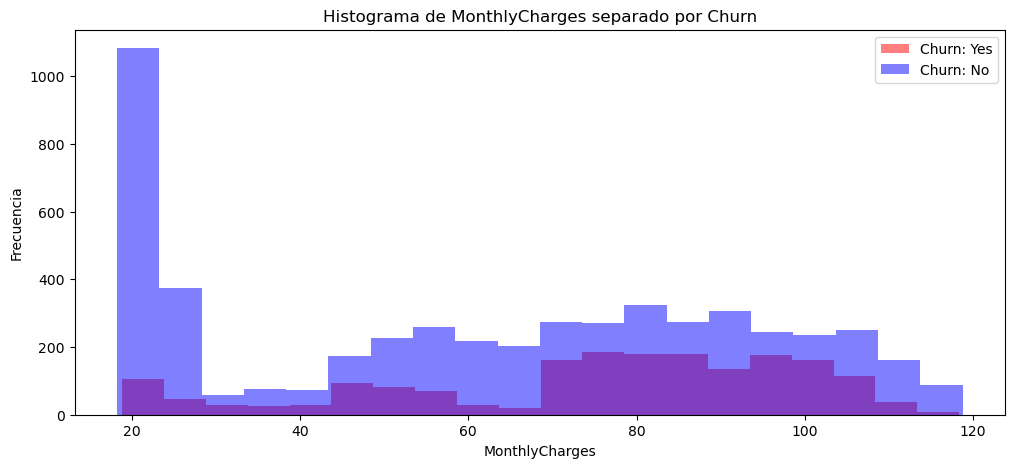

In [16]:
import matplotlib.pyplot as plt
# Change the plots to histograms
plt.figure(figsize=(12, 5))
df[df['Churn'] == 'Yes']['tenure'].plot(kind='hist', bins=20, alpha=0.5, label='Churn: Yes', color='red')
df[df['Churn'] == 'No']['tenure'].plot(kind='hist', bins=20, alpha=0.5, label='Churn: No', color='blue')
plt.title('Histograma de Tenure separado por Churn')
plt.xlabel('Tenure')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
df[df['Churn'] == 'Yes']['MonthlyCharges'].plot(kind='hist', bins=20, alpha=0.5, label='Churn: Yes', color='red')
df[df['Churn'] == 'No']['MonthlyCharges'].plot(kind='hist', bins=20, alpha=0.5, label='Churn: No', color='blue')
plt.title('Histograma de MonthlyCharges separado por Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.legend()
plt.show(block=False)

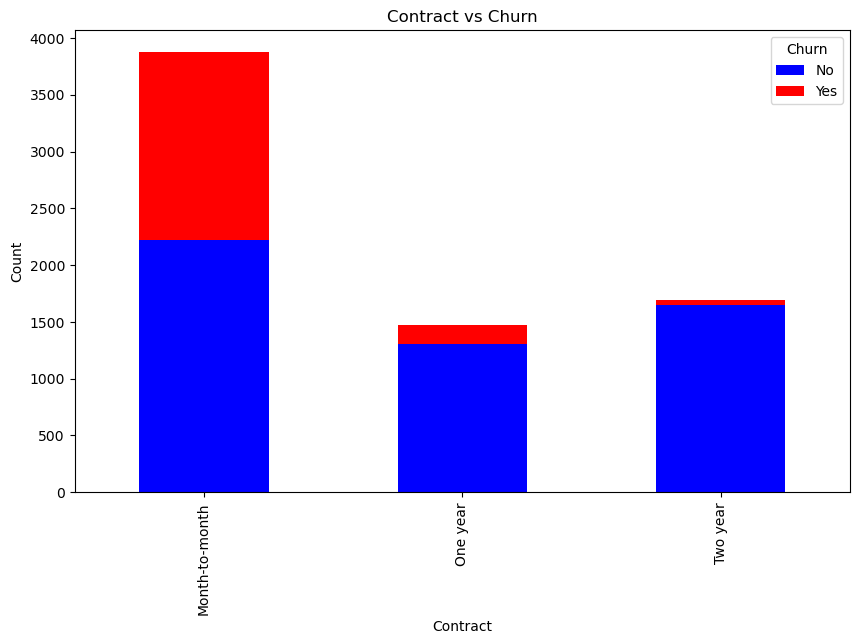

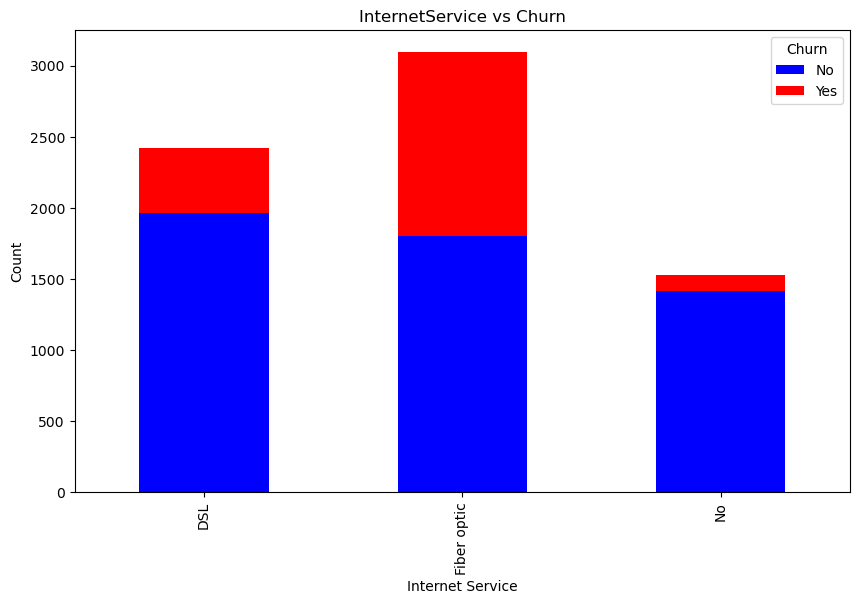

In [17]:
# Contract vs Churn
contract_churn = df.groupby(['Contract', 'Churn']).size().unstack()
contract_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
plt.title('Contract vs Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

# InternetService vs Churn
internet_churn = df.groupby(['InternetService', 'Churn']).size().unstack()
internet_churn.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'red'])
plt.title('InternetService vs Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

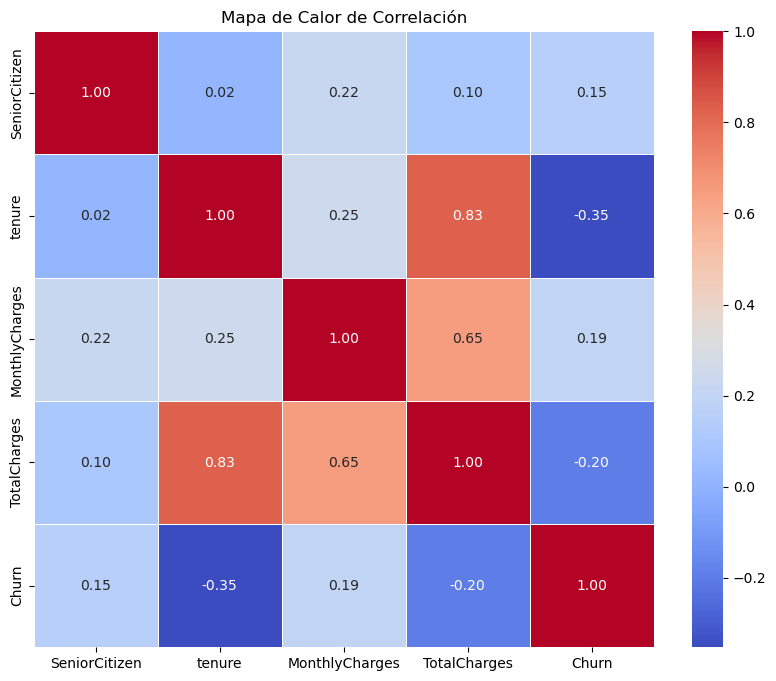

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


df_heatmap = df.copy()
df_heatmap['Churn'] = df_heatmap['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# 2. Seleccionar solo las columnas numéricas
# (Automáticamente pandas ignora las de texto, pero es bueno ser explícito)
numeric_df = df_heatmap.select_dtypes(include=['float64', 'int64'])

# 3. Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()

# 4. Pintar el Heatmap
plt.figure(figsize=(10, 8)) # Tamaño de la figura
sns.heatmap(correlation_matrix, 
            annot=True,        # Escribe el número dentro del cuadro
            cmap='coolwarm',   # Esquema de color (Azul=Bajo, Rojo=Alto)
            fmt=".2f",         # Solo 2 decimales
            linewidths=0.5)    # Líneas entre cuadros

plt.title('Mapa de Calor de Correlación')
plt.show()

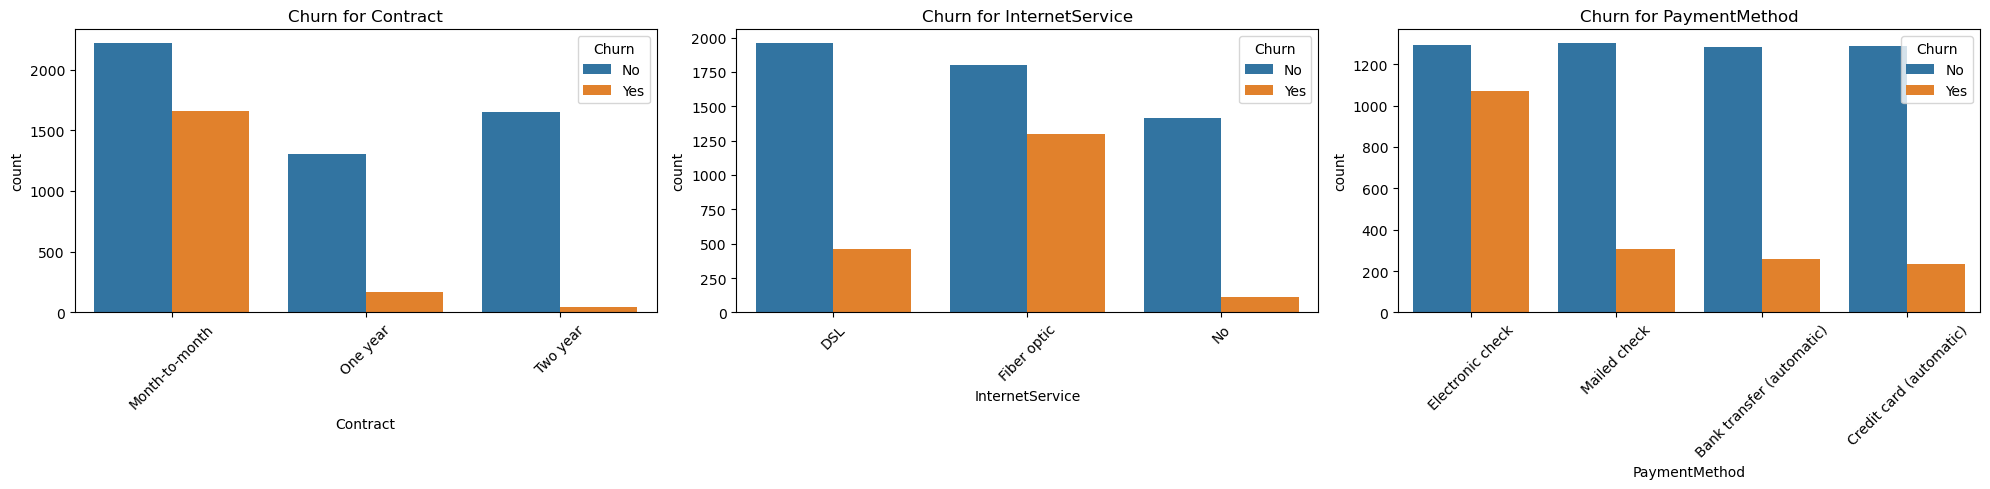

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos las variables categóricas clave a analizar
features_to_analyze = ['Contract', 'InternetService', 'PaymentMethod']

plt.figure(figsize=(20, 5)) # Hacemos el lienzo ancho

for i, col in enumerate(features_to_analyze):
    plt.subplot(1, 3, i + 1) # Creamos 3 gráficas una al lado de la otra
    
    # Creamos el gráfico
    sns.countplot(x=col, hue='Churn', data=df)
    
    plt.title(f'Churn for {col}')
    plt.xticks(rotation=45) # Rotamos las etiquetas para que se lean bien
    plt.tight_layout()

plt.show()

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# 1. Separar Features (X) y Target (y)
# Asumimos que ya corregiste TotalCharges a numérico en el paso anterior
df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = (
    pd.to_numeric(df['TotalCharges'].replace(r'^\s*$', '0', regex=True), errors='coerce')
    .fillna(0.0)
    .astype(float)
)
X = df.drop('Churn', axis=1)
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) # Target numérico

# 2. Definir qué columnas son qué
# OJO: Excluimos 'customerID' porque no aporta nada predictivo
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity',
                        'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod']

# 3. Crear los "Transformadores" para cada tipo de dato

# Para numéricos: Rellenar vacíos con la mediana + Estandarizar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Para categóricos: Rellenar vacíos con "missing" + OneHotEncoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])

# 4. Unir todo en el Preprocesador Maestro (ColumnTransformer)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop' # Tira las columnas que no mencionamos (como customerID)
)

# 5. Dividir en Train y Test (SIEMPRE antes de transformar para evitar fugas de datos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6. Verificamos que funcione (solo para probar)
# Ajustamos el preprocesador solo con el TRAIN set
X_train_processed = preprocessor.fit_transform(X_train)

print(f"Forma original de X_train: {X_train.shape}")
print(f"Forma procesada de X_train: {X_train_processed.shape}")

Forma original de X_train: (5634, 20)
Forma procesada de X_train: (5634, 44)
